In [1]:
import pandas as pd
import numpy as np
import glob

from utils.constants.dir_path import DataDirPath
from utils.constants.constants import Constants
from descriptors.base_info import get_reindex_base

In [2]:
dir_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/two-body/for_angular/nnp-train_10_10'

In [3]:
base_info = DataDirPath.base_structure_info()

In [4]:
PATH = Constants.path()
base_df = get_reindex_base()

alpha-critobalite 1 1150
alpha-quartz 1151 2250
beta-quartz 2251 3050
beta-trydymite 3051 4300
coesite 4301 5500
Fdd2-beta-critobalite 5501 6850
hex-trydymite 6851 7850
stishovite 7851 8550


In [5]:
# base_df['Eatom'] = base_df['E'] / base_df['natom']
# base_df[base_df.structure_idx == 34]
base_df

,structure,structure_idx,natom,E,Vol
0,alpha-critobalite,0,48,-1011.449548,839.055430
1,alpha-critobalite,1,48,-1011.449396,839.055430
2,alpha-critobalite,2,48,-1011.449194,839.055430
3,alpha-critobalite,3,48,-1011.448339,839.055430
4,alpha-critobalite,4,48,-1011.448402,839.055430
...,...,...,...,...,...
8545,stishovite,8545,48,-1010.442985,331.977432
8546,stishovite,8546,48,-1010.386112,331.977432
8547,stishovite,8547,48,-1010.322835,331.977432
8548,stishovite,8548,48,-1010.398489,331.977432


In [378]:
df_test = pd.read_csv(f'{dir_path}/analyze/testpoints.000009.out.csv')
df_train = pd.read_csv(f'{dir_path}/analyze/trainpoints.000009.out.csv')
df_test['index'] += 1
df_train['index'] += 1

In [379]:
df_test_new = pd.merge(df_test,base_df,left_on='index',right_on='structure_idx')
df_train_new = pd.merge(df_train,base_df,left_on='index',right_on='structure_idx')
df_concat = pd.concat([df_test_new, df_train_new])

In [380]:
norm_log_path = '/Users/y1u0d2/Desktop/Lab/result/nnp-train/two-body/for_angular/nnp-train_10_10/input.nn'
with open(norm_log_path) as f:
    l_strip = [line.strip() for line in f.readlines()]
    l_strip = list(filter(None, l_strip))
    mean_arr = [line for line in l_strip if 'mean_energy' in line]
    norm_arr = [line for line in l_strip if 'conv_energy' in line]
for mean, norm in zip(mean_arr, norm_arr):
    mean = float(mean.split(' ')[-1])
    norm = float(norm.split(' ')[-1])
print(mean, norm)

-21.061372010002167 112.2077288944109


In [381]:
df_concat['E_from_norm'] =df_concat.natom *((df_concat.Eref / norm) + float(mean))
df_concat['Ediff'] = df_concat.E - df_concat.E_from_norm

df_test_new['E_from_norm'] =df_test_new.natom *((df_test_new.Eref / norm) + float(mean))
df_test_new['Ediff'] = df_test_new.E - df_test_new.E_from_norm

In [382]:
base_df['Eatom'] = base_df.E / base_df.natom
mean = base_df['Eatom'].mean()
std = base_df['Eatom'].std()


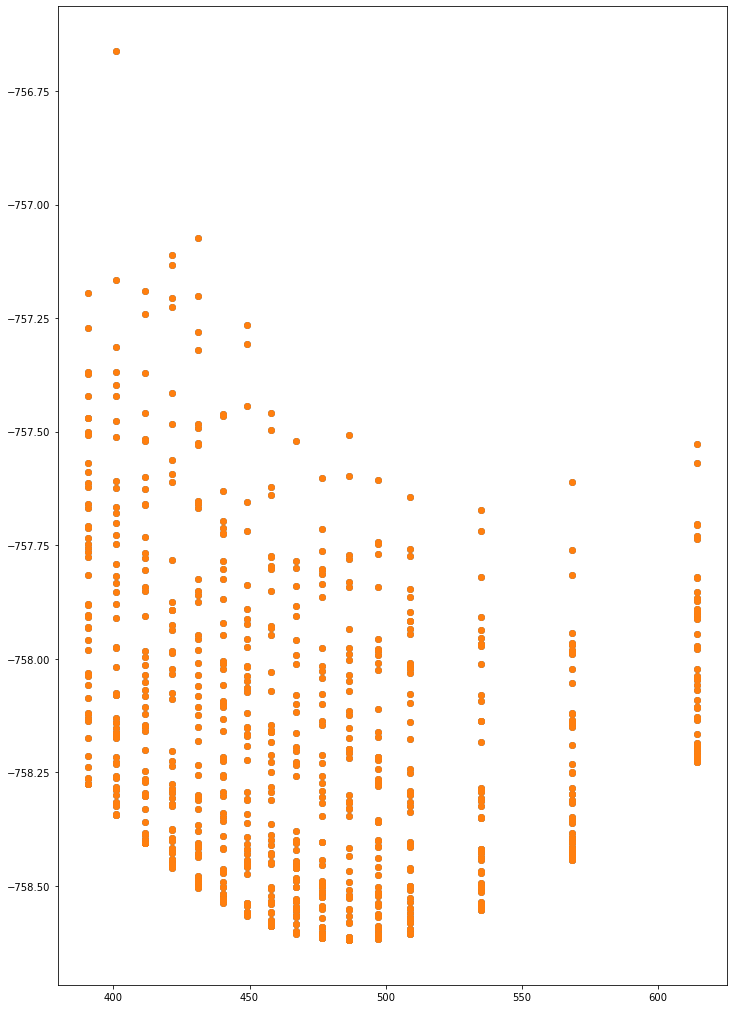

In [383]:
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(12,18))
plt.scatter(df_concat[df_concat.structure == 'beta-quartz'].Vol, df_concat[df_concat.structure == 'beta-quartz'].E)
plt.scatter(df_concat[df_concat.structure == 'beta-quartz'].Vol, df_concat[df_concat.structure == 'beta-quartz'].E_from_norm)

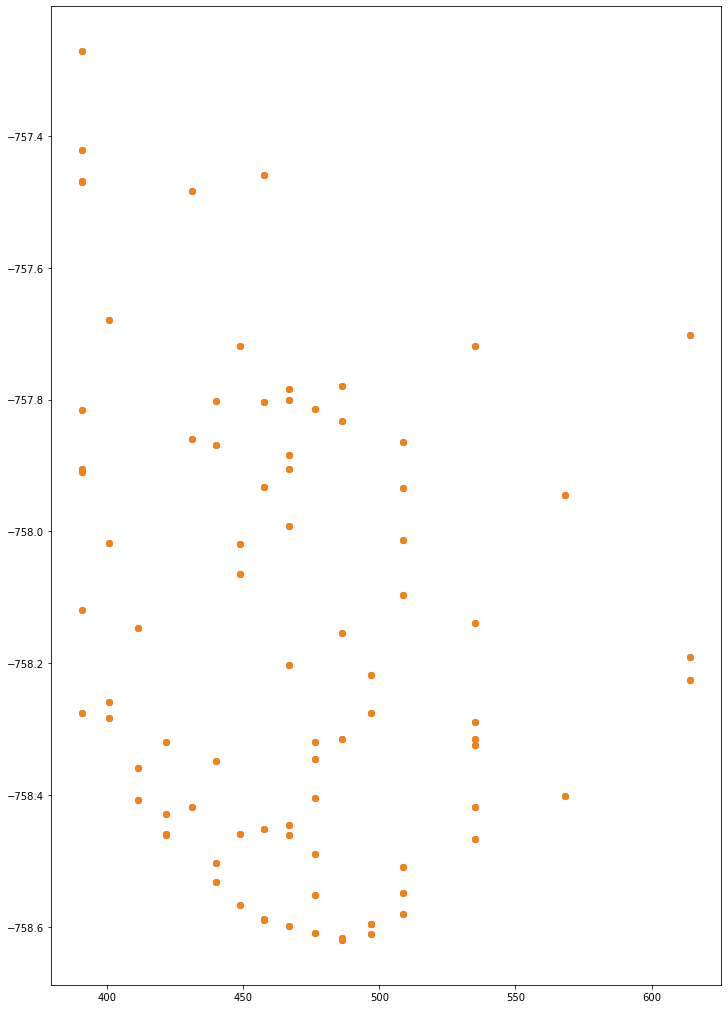

In [384]:
plt.figure(figsize=(12,18))
plt.scatter(df_test_new[df_test_new.structure == 'beta-quartz'].Vol, df_test_new[df_test_new.structure == 'beta-quartz'].E)
plt.scatter(df_test_new[df_test_new.structure == 'beta-quartz'].Vol, df_test_new[df_test_new.structure == 'beta-quartz'].E_from_norm)
